JP Morgan Quantitative Research Job Simulation ✩₊˚.⋆☾⋆⁺₊✧

Task 1 Analysis

Martha McQuillan, 1/6/2025 - 

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# local functions
import importlib
import task1

import importlib, task1
importlib.reload(task1)
from task1 import compute_log_returns
from task1 import plot_price_over_time
from task1 import rolling_mean_returns
from task1 import rolling_volatility
from task1 import plot_rolling_mean
from task1 import plot_rolling_volatility

In [96]:
df = pd.read_csv("Nat_Gas.csv")
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


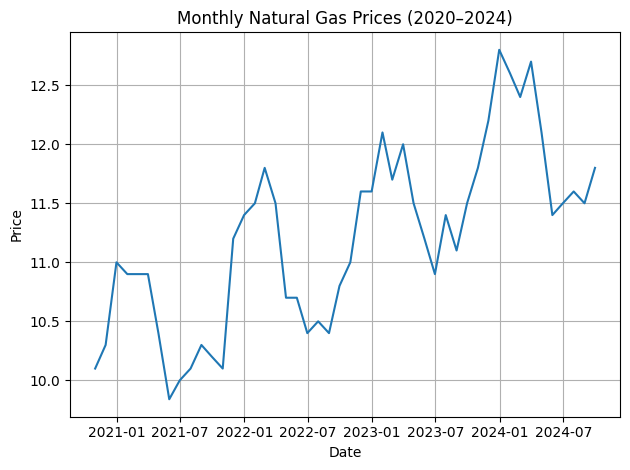

In [97]:
df["Dates"] = pd.to_datetime(df["Dates"], format="mixed")
plot_price_over_time(df)

In [98]:
log_returns = compute_log_returns(df)
df["log_return"] = log_returns
log_returns.head()

0         NaN
1    0.019608
2    0.065751
3   -0.009132
4    0.000000
Name: Prices, dtype: float64

In [99]:
rolling_mean_returns_annual = rolling_mean_returns(df, 12)
rolling_mean_returns_annual.head()

rolling_mean_returns_semiannual = rolling_mean_returns(df, 6)
rolling_mean_returns_semiannual.head()

rolling_mean_returns_quarterly = rolling_mean_returns(df, 3)
rolling_mean_returns_quarterly.head()

df["rm_12"] = rolling_mean_returns(df, 12)
df["rm_6"]  = rolling_mean_returns(df, 6)
df["rm_3"]  = rolling_mean_returns(df, 3)

In [100]:
rolling_volatility_annual = rolling_volatility(df, 12)
rolling_volatility_annual.head()

rolling_volatility_semiannual = rolling_volatility(df, 6)
rolling_volatility_semiannual.head()

rolling_volatility_quarterly = rolling_volatility(df, 3)
rolling_volatility_quarterly.head()

df["vol_12"] = rolling_volatility(df, 12)
df["vol_6"] = rolling_volatility(df, 6)
df["vol_3"] = rolling_volatility(df, 3)

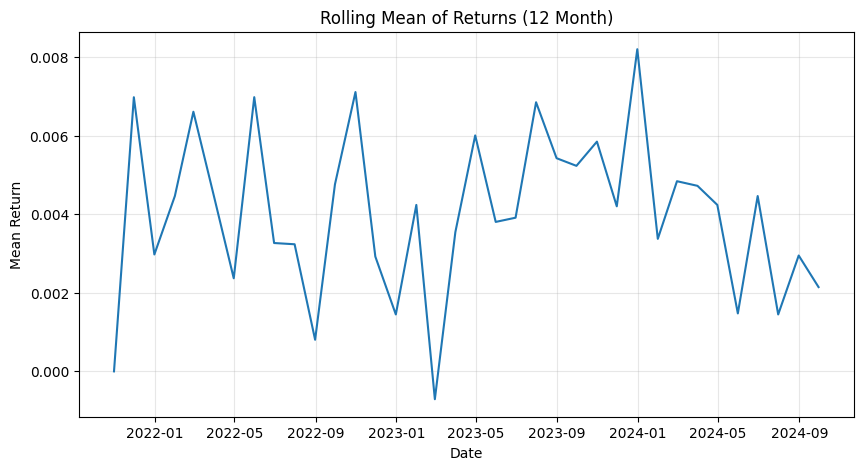

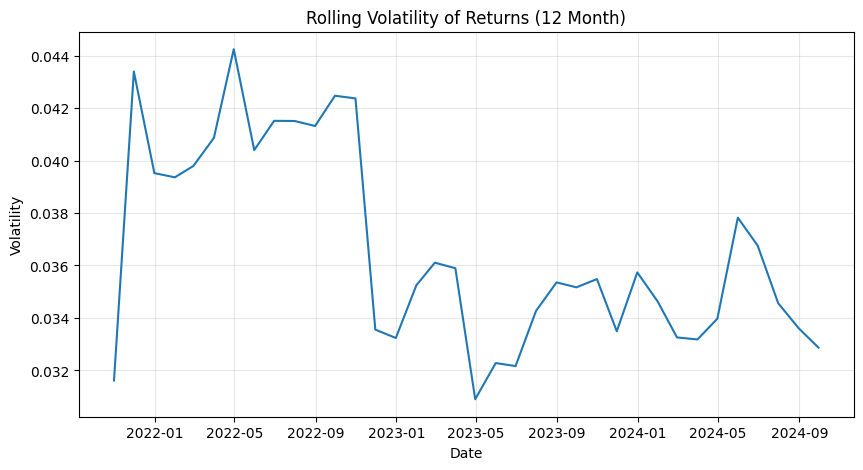

In [103]:
plot_rolling_mean(df)
plot_rolling_volatility(df)